In [4]:
%pip install seaborn

Average Tree Depth: 10.0


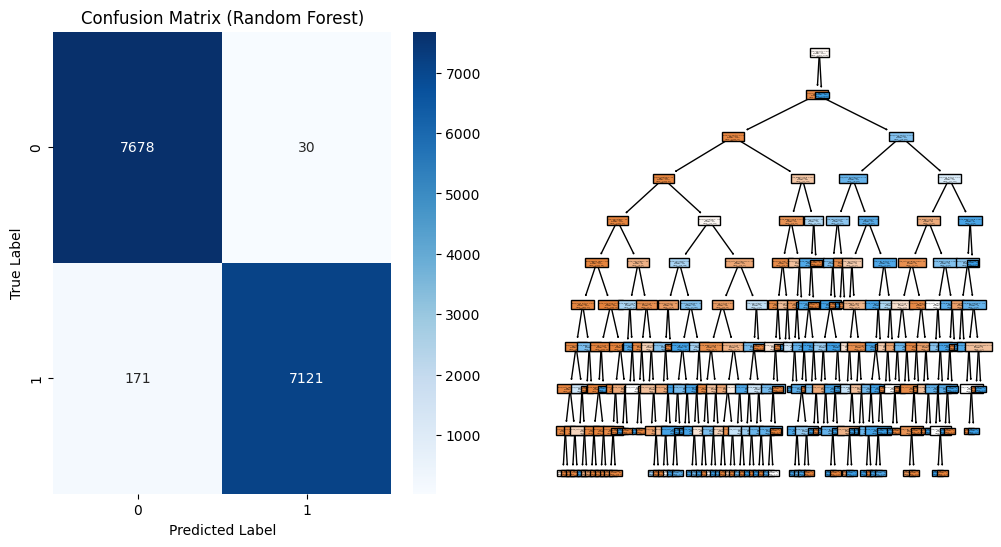

Accuracy: 0.9866
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      7708
           1       1.00      0.98      0.99      7292

    accuracy                           0.99     15000
   macro avg       0.99      0.99      0.99     15000
weighted avg       0.99      0.99      0.99     15000

Precision: 0.9958047825478954
Recall: 0.976549643444871
F1-Score: 0.986083223706986


In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
import numpy as np

# Read the data
game = pd.read_csv("subset.csv")
game = game.set_axis(['Winner', 'White_Weighted_Value', 'Black_Weighted_Value', 
                     'White_Centre_Weighted_Value', 'Black_Centre_Weighted_Value', 
                      'White_King_Safety', 'Black_King_Safety',
                      'White_Piece_Count', 'Black_Piece_Count',
                      'White_Center_Piece_Count', 'Black_Center_Piece_Count',
                      'White_Opponent_Moves', 'Black_Opponent_Moves',
                      'White_Rook_Positions', 'White_Queen_Positions',
                      'White_Knight_Positions', 'White_King_Positions', 'White_Bishop_Positions',
                      'Black_Rook_Positions', 'Black_Queen_Positions',
                      'Black_Knight_Positions', 'Black_King_Positions', 'Black_Bishop_Positions'], axis=1)

# Pre-processing our engineered features (Y/N->0/1)
encoder = LabelEncoder()
game["White_King_Safety"] = encoder.fit_transform(game["White_King_Safety"])
game["Black_King_Safety"] = encoder.fit_transform(game["Black_King_Safety"])
game["Winner"] = encoder.fit_transform(game["Winner"])

# X(predictors), y (target)
X = game.drop(columns=["Winner"])
y = game["Winner"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Average Tree Depth
avg_tree_depth = np.mean([tree.get_depth() for tree in rf_classifier.estimators_])
print(f"Average Tree Depth: {avg_tree_depth}")

# Plot the first tree in the forest
plt.subplot(1, 2, 2)
plot_tree(rf_classifier.estimators_[0], filled=True, feature_names=X.columns, class_names=["0", "1"])
plt.show()

# Rest of the metrics
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


